Name : Sahil Bhagwan Patil

Roll No : BE21IT022

PRN : 72280580C

Class : BE IT A

# Import libraries

In [3]:
import tensorflow_datasets as tfds
import tensorflow as tf
from tensorflow.keras.utils import to_categorical

# Load the data

In [4]:
## Loading images and labels
(train_ds, train_labels), (test_ds, test_labels) = tfds.load("tf_flowers",
    split=["train[:70%]", "train[:30%]"], ## Train test split
    batch_size=-1,
    as_supervised=True,  # Include labels
)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/1 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling C:\Users\SAHIL PATIL\tensorflow_datasets\tf_flowers\incomplete.JE5M8O_3.0.1\tf_flowers-train.tfrecor…

Dataset tf_flowers downloaded and prepared to C:\Users\SAHIL PATIL\tensorflow_datasets\tf_flowers\3.0.1. Subsequent calls will reuse this data.



# Image preprocessing 

In [5]:
# check existing image size
train_ds[0].shape

TensorShape([442, 1024, 3])

In [6]:
## Resizing images
train_ds = tf.image.resize(train_ds, (150, 150))
test_ds = tf.image.resize(test_ds, (150, 150))

In [7]:
## Transforming labels to correct format
train_labels = to_categorical(train_labels, num_classes=5)
test_labels = to_categorical(test_labels, num_classes=5)

# Load a pre-trained CNN model trained on a large dataset - VGG16 Image Classification model

In [9]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input

In [10]:
train_ds[0].shape

TensorShape([150, 150, 3])

In [11]:
# Loading VGG16 model
base_model = VGG16(weights="imagenet", include_top=False, input_shape=train_ds[0].shape)

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 20s 0us/step


In [12]:
# Freeze Parameters in model's lower convolutional layers
base_model.trainable = False 

In [13]:
# Preprocessing input
train_ds = preprocess_input(train_ds) 
test_ds = preprocess_input(test_ds)

In [14]:
base_model.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 150, 150, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 150, 150, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 150, 150, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 75, 75, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 75, 75, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 75, 75, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 37, 37, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 37, 37, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 37, 37, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 37, 37, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 18, 18, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 18, 18, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 18, 18, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 18, 18, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 9, 9, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 9, 9, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 9, 9, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 9, 9, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 4, 4, 512)           │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 14,714,688 (56.13 MB)

# Add custom classifier with two dense layers of trainable parameters to model

In [15]:
#add our layers on top of this model
from tensorflow.keras import layers, models

flatten_layer = layers.Flatten()
dense_layer_1 = layers.Dense(50, activation='relu')
dense_layer_2 = layers.Dense(20, activation='relu')
prediction_layer = layers.Dense(5, activation='softmax')


model = models.Sequential([
    base_model,
    flatten_layer,
    dense_layer_1,
    dense_layer_2,
    prediction_layer
])

# Train classifier layers on training data available for task

In [16]:
from tensorflow.keras.callbacks import EarlyStopping

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy'],
)

In [17]:
es = EarlyStopping(monitor='val_accuracy', mode='max', patience=5,  restore_best_weights=True)

In [18]:
history=model.fit(train_ds, train_labels, epochs=50, validation_split=0.2, batch_size=32, callbacks=[es])

Epoch 1/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 121s 2s/step - accuracy: 0.4162 - loss: 2.5155 - val_accuracy: 0.5700 - val_loss: 1.4122
Epoch 2/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 118s 2s/step - accuracy: 0.6504 - loss: 0.9954 - val_accuracy: 0.6712 - val_loss: 1.0141
Epoch 3/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 116s 2s/step - accuracy: 0.7585 - loss: 0.6519 - val_accuracy: 0.6848 - val_loss: 1.2257
Epoch 4/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 117s 2s/step - accuracy: 0.8249 - loss: 0.5056 - val_accuracy: 0.6654 - val_loss: 1.1335
Epoch 5/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 116s 2s/step - accuracy: 0.8565 - loss: 0.3954 - val_accuracy: 0.7023 - val_loss: 1.0687
Epoch 6/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 114s 2s/step - accuracy: 0.8937 - loss: 0.2775 - val_accuracy: 0.6926 - val_loss: 1.2140
Epoch 7/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 117s 2s/step - accuracy: 0.9055 - loss: 0.2472 - val_accuracy: 0.7121 - val_loss: 1.1421
Epoch 8/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 115s 2s/step - accuracy: 0.9313 - loss: 0.1726 - val_accuracy: 0.7237 - v

In [22]:
loss,accuracy=model.evaluate(test_ds,test_labels)
print("Loss: ",loss,"Accuracy: ", accuracy)

35/35 ━━━━━━━━━━━━━━━━━━━━ 49s 1s/step - accuracy: 0.9400 - loss: 0.1309
Loss:  0.1301710605621338 Accuracy:  0.9473206400871277


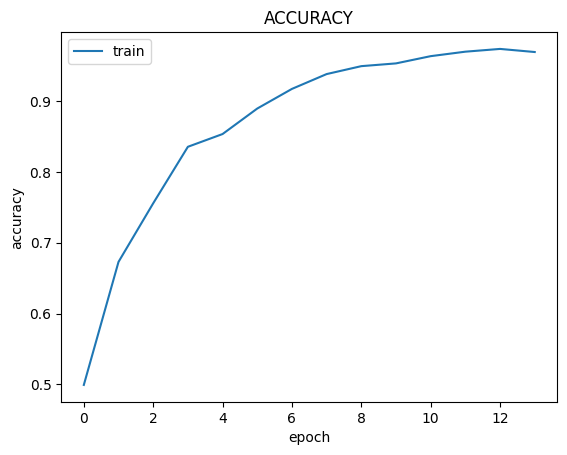

In [23]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.title('ACCURACY')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'],loc='upper left')
plt.show()

In [24]:
import numpy as np
import pandas as pd
y_pred = model.predict(test_ds)
y_classes = [np.argmax(element) for element in y_pred]
#to_categorical(y_classes, num_classes=5)
#to_categorical(test_labels, num_classes=5)
print(y_classes[:10])
print("\nTest")
print(test_labels[:10])

35/35 ━━━━━━━━━━━━━━━━━━━━ 50s 1s/step
[2, 3, 3, 1, 3, 0, 0, 0, 0, 1]

Test
tf.Tensor(
[[0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]], shape=(10, 5), dtype=float32)
